In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr
from plot import *
import numpy as np 

In [2]:
warnings.filterwarnings(action='ignore', category=FutureWarning) 
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

In [3]:
def annotation_across_method(data1,data2):
    pccs = pearsonr(data1, data2)
    pval = pccs.pvalue
    stat = '{:.2f}'.format(pccs.statistic)
    return pval,stat

In [4]:
def get_file(dir_path,prefix,method):
    file_path = dir_path+prefix+"_"+method+".csv"
    df = pd.read_csv(file_path,sep=",",index_col=0)
    return df
def get_ground_truth(dir_path,prefix):
    ground_truth = dir_path+prefix+"_fraction"+".csv"
    df = pd.read_csv(ground_truth,sep=",",index_col=0)
    return df

In [5]:
ground_truth = get_ground_truth("/mnt/e/CytoBulk/pretrain_evaluation/NSCLC_GSE127471/","NSCLC_GSE127471")
cell_name = ground_truth.columns.values.tolist()


# format abis results
abis_result = get_file("/mnt/e/CytoBulk/pretrain_evaluation/NSCLC_GSE127471/","NSCLC_GSE127471","ABIS")
abis_result["Monocytes"] = abis_result["Monocytes C"]+abis_result["Monocytes NC+I"]
abis_result["B cells"] = abis_result["B Memory"]+abis_result["B Naive"]
abis_result["T CD8 exhausted cells"] = 0
abis_result["Macrophages M1"] = 0
abis_result.rename(columns={"T CD4 Naive":"T CD4 naive cells","NK":"NK cells"},inplace=True)
abis_result = abis_result.loc[:,cell_name]
abis_result.fillna(0,inplace=True)

# format cibersort results
cibersort_result = get_file("/mnt/e/CytoBulk/pretrain_evaluation/NSCLC_GSE127471/","NSCLC_GSE127471","CIBERSORT")
cibersort_result["NK cells"] = cibersort_result["NK cells resting"]+cibersort_result["NK cells activated"]
cibersort_result["B cells"] = cibersort_result["B cells naive"]+cibersort_result["B cells memory"]
cibersort_result["T CD8 exhausted cells"] = 0
cibersort_result.rename(columns={"T cells CD4 naive":"T CD4 naive cells","NK":"NK cells"},inplace=True)
cibersort_result = cibersort_result.loc[:,cell_name]
cibersort_result.fillna(0,inplace=True)

cibersortx_result = get_file("/mnt/e/CytoBulk/pretrain_evaluation/NSCLC_GSE127471/","NSCLC_GSE127471","CIBERSORTx")
cibersortx_result["NK cells"] = cibersortx_result["NK cells resting"]+cibersortx_result["NK cells activated"]
cibersortx_result["B cells"] = cibersortx_result["B cells naive"]+cibersortx_result["B cells memory"]
cibersortx_result["T CD8 exhausted cells"] = 0
cibersortx_result.rename(columns={"T cells CD4 naive":"T CD4 naive cells","NK":"NK cells"},inplace=True)
cibersortx_result = cibersortx_result.loc[:,cell_name]
cibersortx_result.fillna(0,inplace=True)

# format epic results
epic_result = get_file("/mnt/e/CytoBulk/pretrain_evaluation/NSCLC_GSE127471/","NSCLC_GSE127471","EPIC")
epic_result["T CD8 exhausted cells"] = 0
epic_result["T CD4 naive cells"] = 0
epic_result["Monocytes"] = 0
epic_result.rename(columns={"Bcells":"B cells","Macrophages":"Macrophages M1","NKcells":"NK cells"},inplace=True)
epic_result = epic_result.loc[:,cell_name]
epic_result.fillna(0,inplace=True)

# format MCPcounter results
mcp_result = get_file("/mnt/e/CytoBulk/pretrain_evaluation/NSCLC_GSE127471/","NSCLC_GSE127471","MCPcounter")
mcp_result["T CD8 exhausted cells"] = 0
mcp_result["T CD4 naive cells"] = 0
mcp_result["Macrophages M1"] = 0
mcp_result.rename(columns={"B lineage":"B cells","Monocytic lineage":"Monocytes"},inplace=True)
mcp_result = mcp_result.loc[:,cell_name]
mcp_result.fillna(0,inplace=True)

# format xcell results
xcell_result = get_file("/mnt/e/CytoBulk/pretrain_evaluation/NSCLC_GSE127471/","NSCLC_GSE127471","xCell")
xcell_result["T CD8 exhausted cells"] = 0
xcell_result.rename(columns={"B-cells":"B cells","CD4+ naive T-cells":"T CD4 naive cells"},inplace=True)
xcell_result = xcell_result.loc[:,cell_name]
xcell_result.fillna(0,inplace=True)

# format timer results
timer_result = get_file("/mnt/e/CytoBulk/pretrain_evaluation/NSCLC_GSE127471/","NSCLC_GSE127471","TIMER")
timer_result["T CD8 exhausted cells"] = 0
timer_result["T CD4 naive cells"] = 0
timer_result["Monocytes"] = 0
timer_result["Macrophages M1"] = 0
timer_result["NK cells"] = 0
timer_result.rename(columns={"B_cell":"B cells"},inplace=True)
timer_result = timer_result.loc[:,cell_name]
timer_result.fillna(0,inplace=True)

#format quantiseq
quantiseq_result = get_file("/mnt/e/CytoBulk/pretrain_evaluation/NSCLC_GSE127471/","NSCLC_GSE127471","quanTIseq")
quantiseq_result["T CD8 exhausted cells"] = 0
quantiseq_result["T CD4 naive cells"] = 0
quantiseq_result = quantiseq_result.loc[:,cell_name]
quantiseq_result.fillna(0,inplace=True)




In [6]:
method_list = [abis_result,cibersort_result,cibersortx_result,mcp_result,xcell_result,timer_result,quantiseq_result]
pearsonr_df = np.zeros((len(method_list),len(cell_name)))
sig_df = np.zeros((len(method_list),len(cell_name)))
for i in range(len(method_list)):
    for j in range(len(cell_name)):
        data1 = method_list[i].loc[:,cell_name[j]].values
        data2 = ground_truth.loc[:,cell_name[j]].values
        pval,stat = annotation_across_method(data1,data2)
        pearsonr_df[i,j] = pval
        sig_df[i,j] = stat

In [7]:
method_name = ["ABIS","CIBERSORT","CIBERSORTx","MCPcounter","xCell","TIMER","quanTIseq"]
sig_df = pd.DataFrame(sig_df,index=method_name,columns=cell_name)
pearsonr_df = pd.DataFrame(pearsonr_df,index=method_name,columns=cell_name)
annot = np.chararray(pearsonr_df.shape, unicode=True)
for i in range(pearsonr_df.shape[0]):
    for j in range(pearsonr_df.shape[1]):
        s = str(pearsonr_df.iloc[i, j])
        if pearsonr_df.iloc[i, j] <=0.001:
            annot[i, j] = '***'
        elif 0.001<pearsonr_df.iloc[i, j]<=0.01:
            annot[i, j] = '**'
        elif 0.01<pearsonr_df.iloc[i, j]<=0.05:
            annot[i, j] = '*'
        elif str(pearsonr_df.iloc[i, j])=="nan":
            annot[i, j] = 'X'

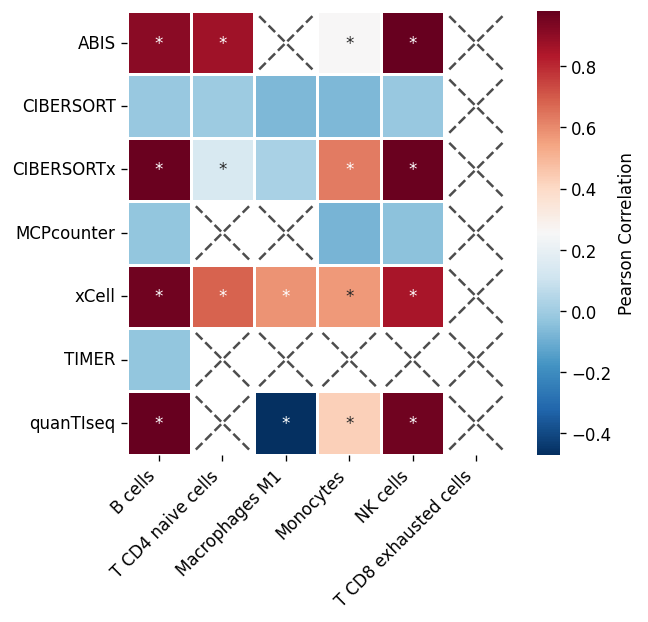

In [8]:
plt.figure(dpi=120)
ax = sns.heatmap(data=sig_df,linewidths=.8,cmap='RdBu_r',square=True,annot=annot,fmt='',cbar=True,
                 cbar_kws={'label': 'Pearson Correlation'})
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
for i in range(annot.shape[0]):
    for j in range(annot.shape[1]):
        if annot[i, j] == 'X':
            ax.plot([j+0.08, j+0.92], [i+0.08, i+0.92], ls="--", c=".3")
            ax.plot([j+0.08, j+0.92], [i+0.92, i+0.08], ls="--", c=".3")